In [9]:
import libtiff
import imageio
import PIL
import numpy as np
import matplotlib.pyplot as plt
import fastai as fai
import fastai.vision as faiv
import fastai.callbacks as faic

In [3]:
# Modify accordingly
path = faiv.Path('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/')

# dataset_name = 'real-world_SEM'

lr_name = f'training/trainsets/crappified/'
lr_path = path/f'{lr_name}'
lr_files = sorted(list(lr_path.glob('*.tif')))

hr_name = f'training/trainsets/hr/'
hr_path = path/f'{hr_name}'
hr_files = sorted(list(hr_path.glob('*.tif')))

print('Processing '+str(len(lr_files))+' files...')

Processing 99997 files...


In [4]:
def load_img(img_fn):
    """Loads input image into matrix using filename"""
    img = libtiff.TiffFile(img_fn)
    img_mat = img.get_tiff_array()[0].astype(np.float32)[np.newaxis, :]
    return img_mat

In [7]:
# Set size for visualizations
fig_size = plt.rcParams["figure.figsize"]  # Get current size
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


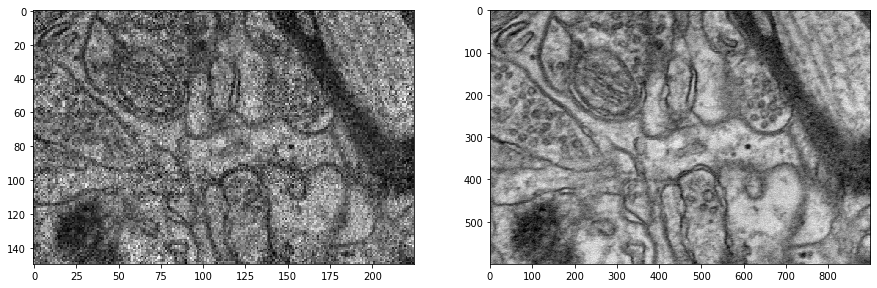

In [10]:
sn = 8 # image number
lr_im = load_img(lr_files[sn]) # load image to tensor
hr_im = load_img(hr_files[sn]) # load image to tensor
f, axarr = plt.subplots(1,2) # create visualizations
axarr[0].imshow(np.squeeze(lr_im), cmap=plt.cm.gray) # visualize image tensor
axarr[1].imshow(np.squeeze(hr_im), cmap=plt.cm.gray) # visualize image tensor
plt.show() # show visualizationiff.

In [11]:
def img_to_uint8(img):
    return img.astype(np.uint8)

In [20]:
t = img_to_uint8(hr_im)

In [26]:
imageio.mimwrite("test.tiff", t, )

In [25]:
hr_files[sn]

PosixPath('/home/alaa/Dropbox (BPHO)/BPHO Staff/USF/EM/training/trainsets/hr/EM_train_hr_00009.tif')

In [30]:
im = PIL.Image.fromarray(np.squeeze(t))

In [31]:
im.save('test2.tif')

In [55]:
img = libtiff.TiffFile(hr_files[sn])

NotImplementedError: 'rgb'

In [50]:
t = img.get_tiff_array()[0]

In [51]:
t.shape

(600, 900)

# Load and Write using PIL (RGB)

In [59]:
im = PIL.Image.open(hr_files[sn])

In [60]:
im.load()

In [63]:
im

'RGB'

In [64]:
im.save('test3.tif')